In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
#import shap
import plotly.graph_objs as go
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [7]:
def plot_data_count(df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{(h*100/sum(df.Month.value_counts())):.2f}", (x+w/2, h),ha='center', va='bottom', fontsize=12)
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)

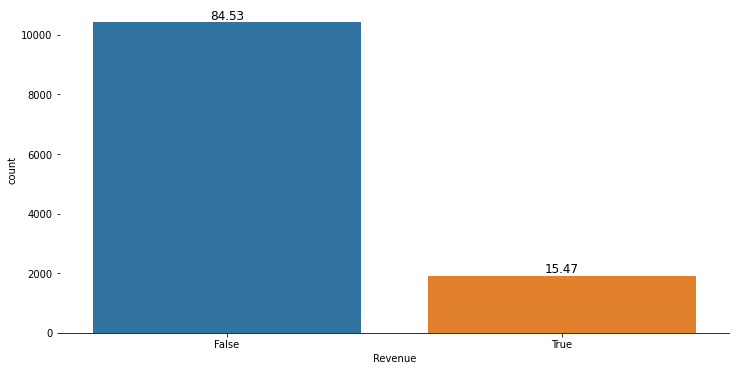



Percent share for each category:
False    84.525547
True     15.474453
Name: Revenue, dtype: float64


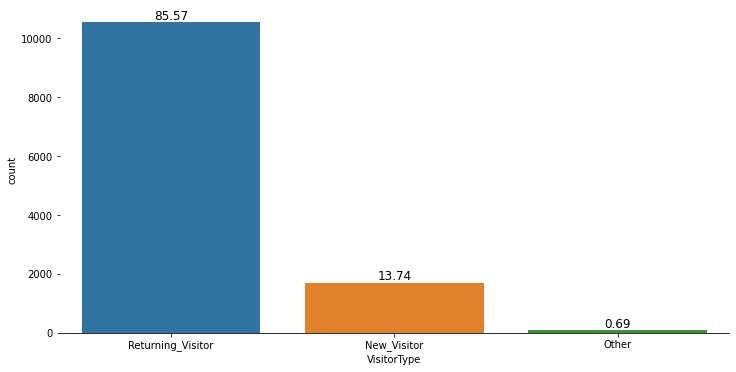



Percent share for each category:
Returning_Visitor    85.571776
New_Visitor          13.738848
Other                 0.689376
Name: VisitorType, dtype: float64


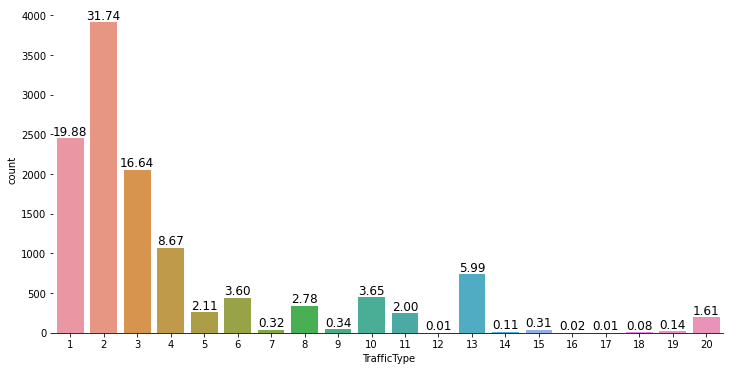



Percent share for each category:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: TrafficType, dtype: float64


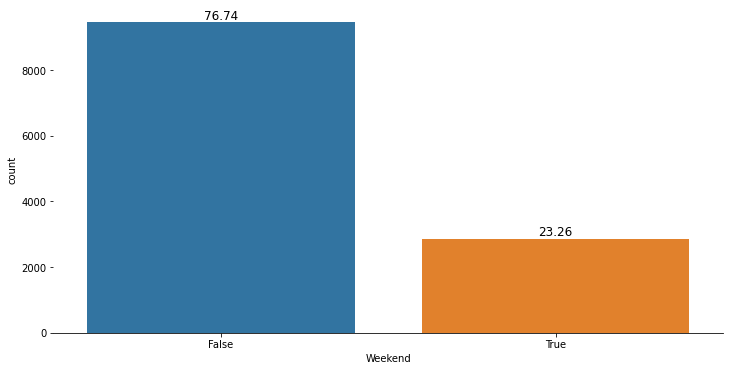



Percent share for each category:
False    76.739659
True     23.260341
Name: Weekend, dtype: float64


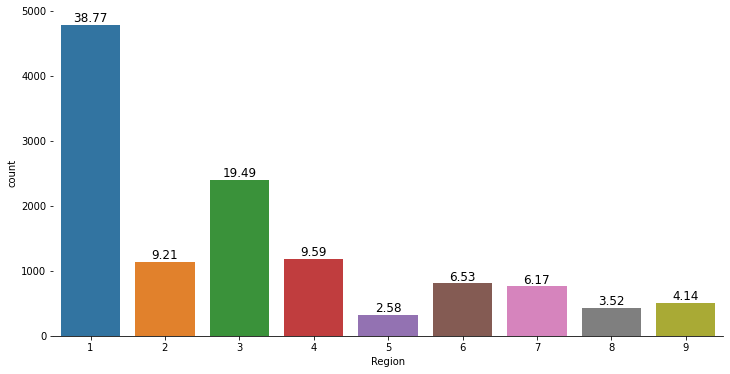



Percent share for each category:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64


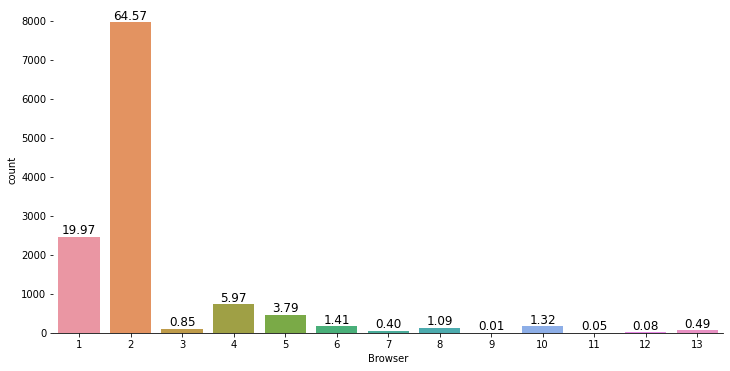



Percent share for each category:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64


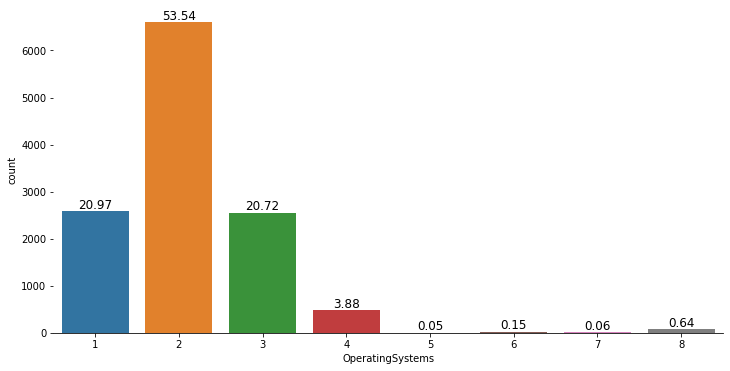



Percent share for each category:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64


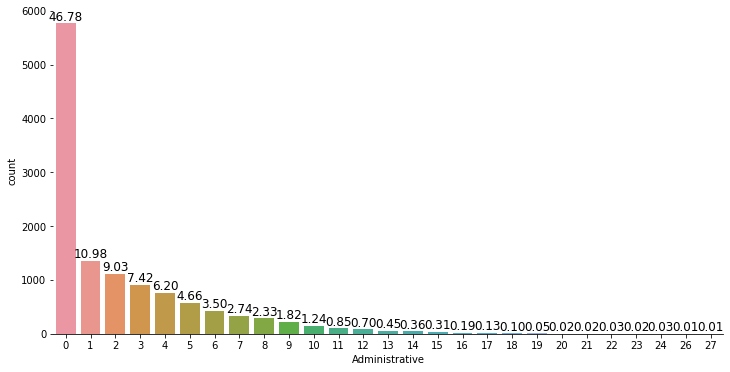



Percent share for each category:
0     46.780211
1     10.981346
2      9.034874
3      7.420925
4      6.204380
5      4.663423
6      3.503650
7      2.741281
8      2.327656
9      1.824818
10     1.240876
11     0.851582
12     0.697486
13     0.454177
14     0.356853
15     0.308191
16     0.194647
17     0.129765
18     0.097324
19     0.048662
24     0.032441
22     0.032441
23     0.024331
21     0.016221
20     0.016221
27     0.008110
26     0.008110
Name: Administrative, dtype: float64


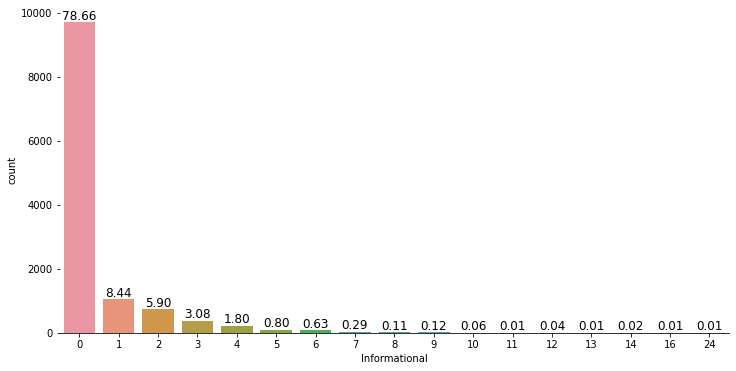



Percent share for each category:
0     78.661800
1      8.442822
2      5.904298
3      3.081914
4      1.800487
5      0.802920
6      0.632603
7      0.291971
9      0.121655
8      0.113544
10     0.056772
12     0.040552
14     0.016221
16     0.008110
11     0.008110
24     0.008110
13     0.008110
Name: Informational, dtype: float64


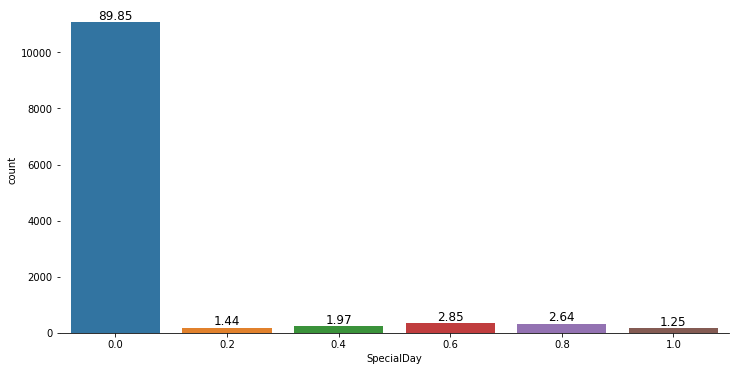



Percent share for each category:
0.0    89.854015
0.6     2.846715
0.8     2.635848
0.4     1.970803
0.2     1.443633
1.0     1.248986
Name: SpecialDay, dtype: float64


In [8]:
plot_data_count(df, 'Revenue')
plot_data_count(df, 'VisitorType')
plot_data_count(df, 'TrafficType')
plot_data_count(df, 'Weekend')
plot_data_count(df, 'Region')
plot_data_count(df, 'Browser')
plot_data_count(df, 'OperatingSystems')
plot_data_count(df, 'Administrative')
plot_data_count(df, 'Informational')
plot_data_count(df, 'SpecialDay')


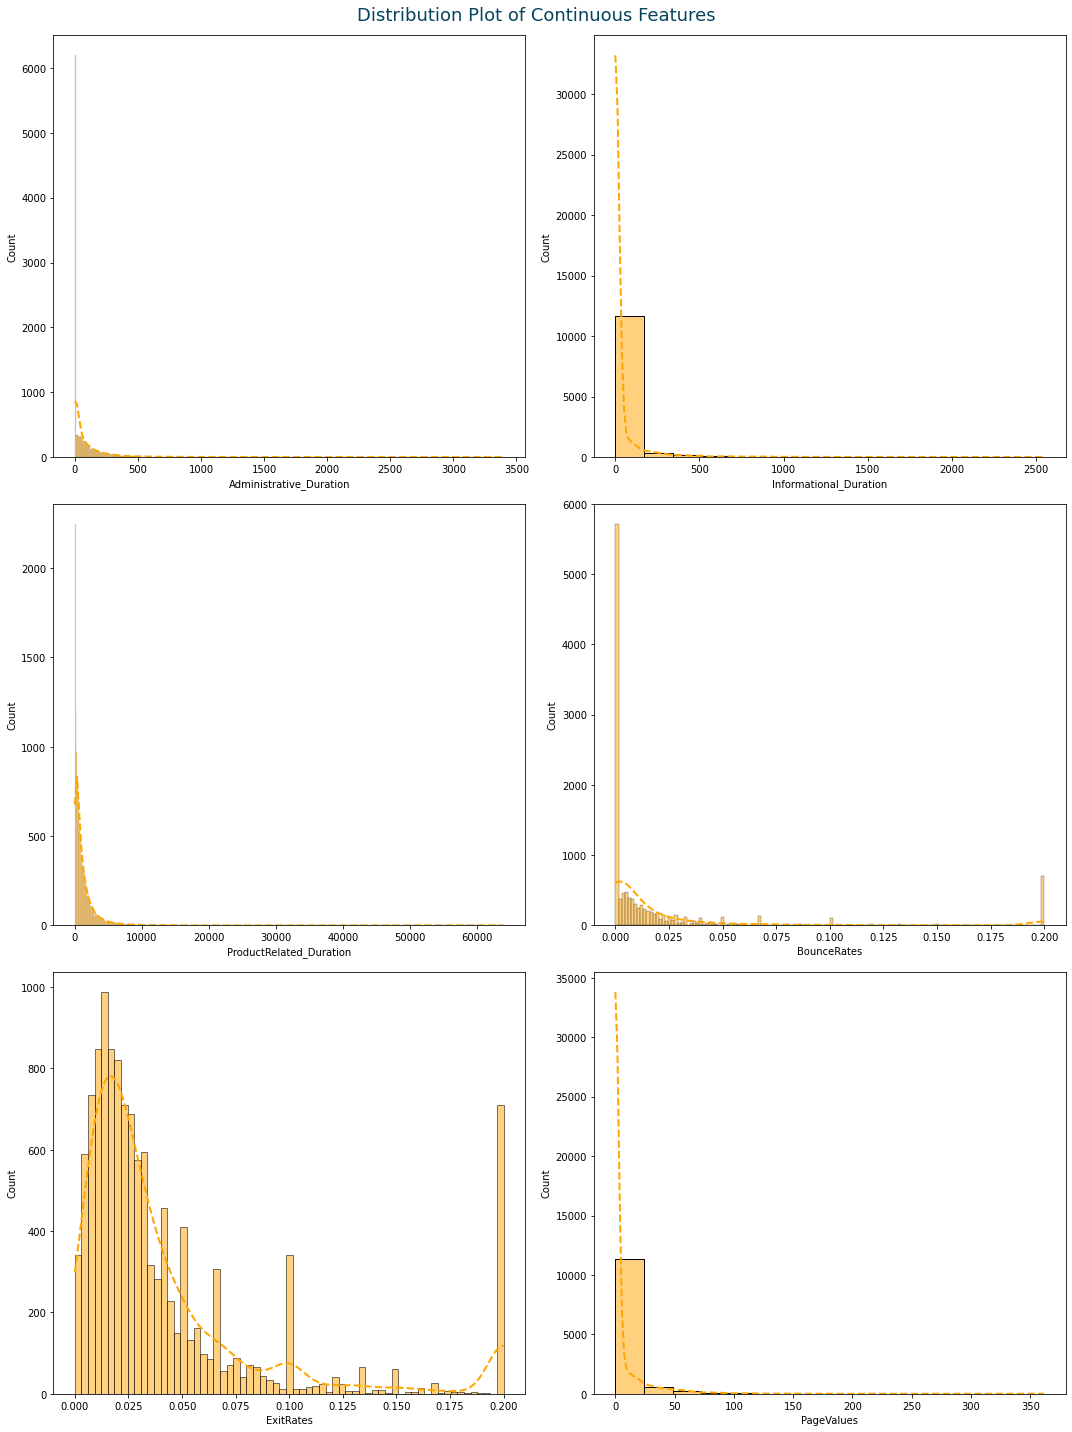

In [9]:
continuous_features = ['Administrative_Duration', 
                       'Informational_Duration', 
                       'ProductRelated_Duration', 
                       'BounceRates', 
                       'ExitRates', 
                       'PageValues']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
axs = np.ravel(axs)
for i, col in enumerate(continuous_features):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color='orange')

plt.suptitle("Distribution Plot of Continuous Features", fontsize=18, color='#05445E', va='bottom')
plt.tight_layout()
plt.show()


In [10]:
#Conversion to Numerical format
data = df.copy()
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)

In [11]:
# Assigning numbers to Months
temp_data = data.copy()
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
temp_data['Month']=temp_data['Month'].map(month_map)

#Assigning numbers to Visitor Type
vistor_map={'New_Visitor':0,'Returning_Visitor':1,'Other':2}
temp_data['VisitorType']=temp_data['VisitorType'].map(vistor_map)
temp_data['Weekend'] = temp_data['Weekend'].astype(int)

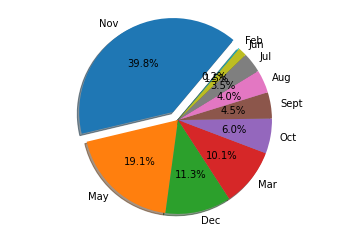

In [12]:
s=temp_data[temp_data["Revenue"]==1]
s=s["Month"]

Months= 'Nov','May','Dec','Mar','Oct','Sept','Aug','Jul','Jun','Feb'
fig1,ax1=plt.subplots()
explode=(0.1,0,0,0,0,0,0,0,0,0)

ax1.pie(s.value_counts(),explode=explode,autopct='%1.1f%%',labels= Months,shadow=True,startangle=50)
ax1.axis('equal')
plt.show()

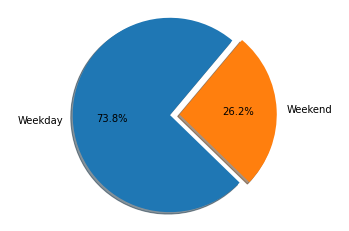

In [13]:
temp_data.Weekend.unique()
d=temp_data[temp_data["Revenue"]==1]
d=d["Weekend"]
d.value_counts()
Day= "Weekday","Weekend"
fig1,ax1=plt.subplots()
explode=(0.1,0)
ax1.pie(d.value_counts(),explode=explode,labels= Day, autopct='%1.1f%%', shadow=True,startangle=50)
ax1.axis('equal')
plt.show()

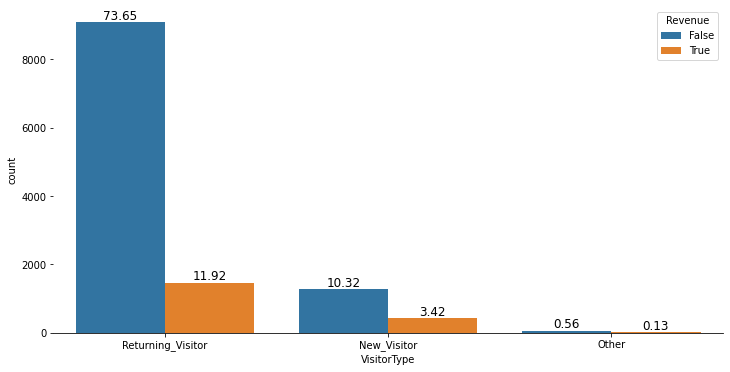

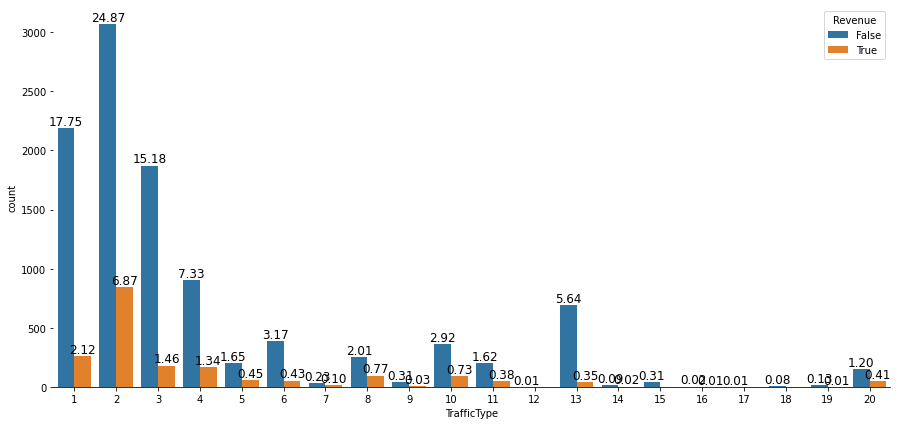

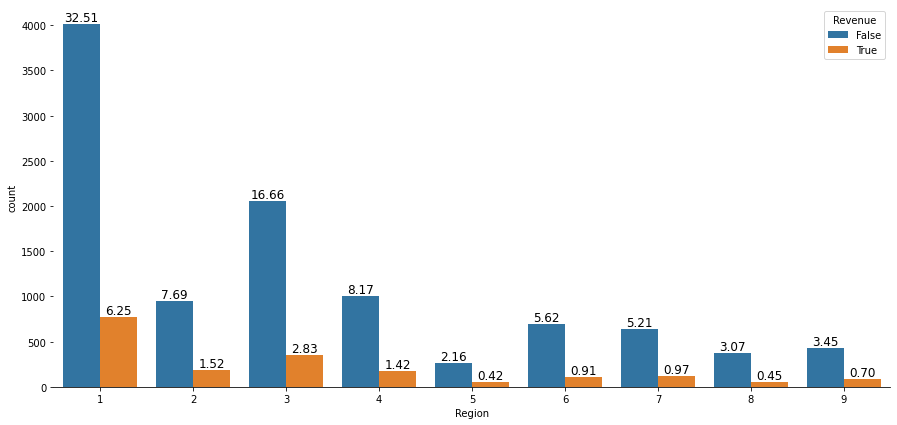

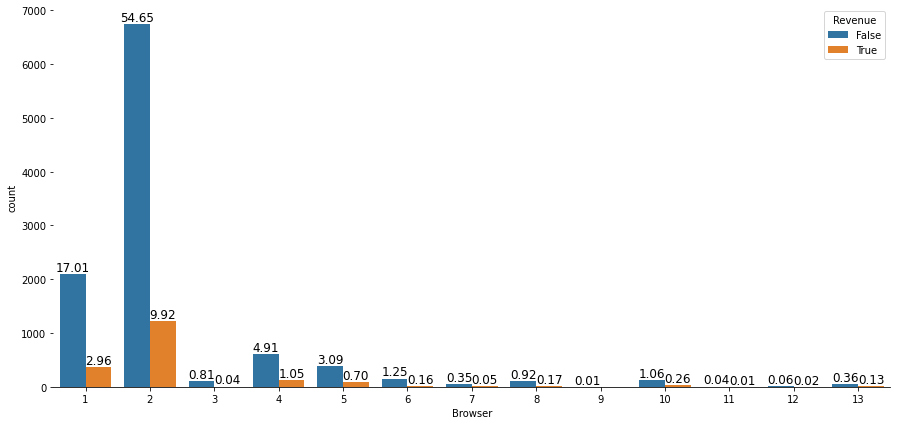

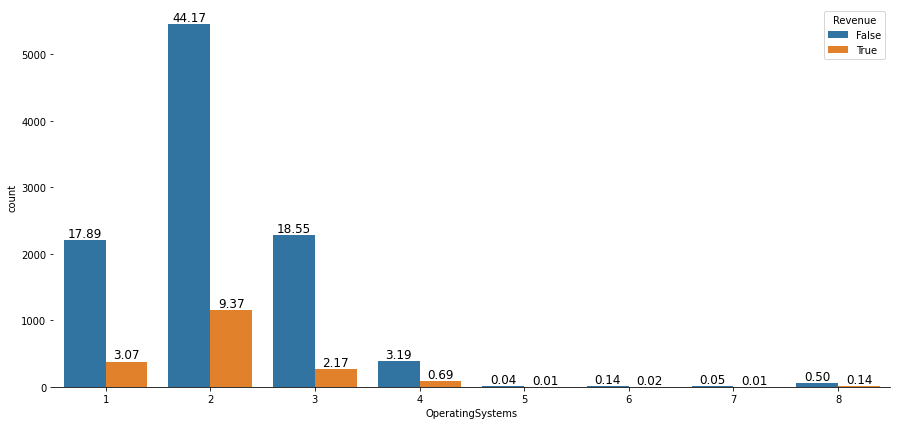

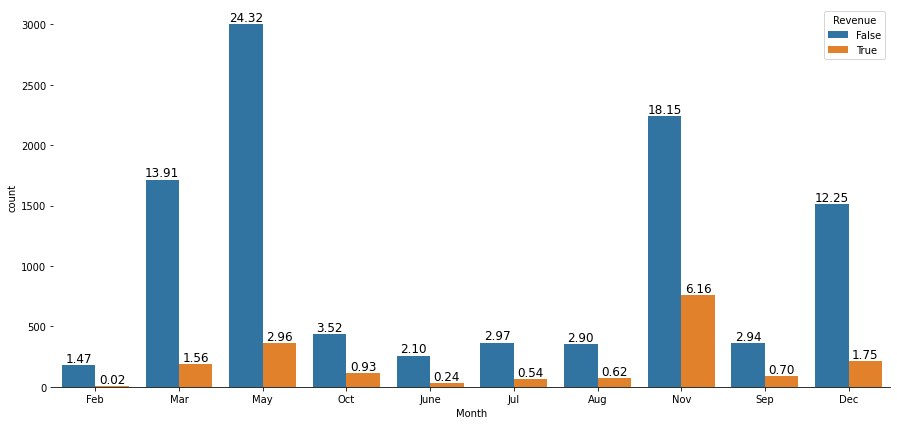

In [14]:
plot_data_count(df, col='VisitorType', return_pct_share=False, hue='Revenue')
plot_data_count(df, col='TrafficType', return_pct_share=False, hue='Revenue', figsize=(15,7))
plot_data_count(df, col='Region', return_pct_share=False, hue='Revenue', figsize=(15,7))
plot_data_count(df, col='Browser', return_pct_share=False, hue='Revenue', figsize=(15,7))
plot_data_count(df, col='OperatingSystems', return_pct_share=False, hue='Revenue', figsize=(15,7))
plot_data_count(df, col='Month', return_pct_share=False, hue='Revenue', figsize=(15,7))